In [16]:
import pandas as pd


In [17]:
df = pd.read_csv('./aqi_weather_data.csv')
print(df.head())

   aqi_index  aqi_timestamp       co    no    no2     o3    so2  pm2_5  \
0        4.0   1.729624e+09  1201.63  0.01  45.24  41.13   8.82  68.43   
1        4.0   1.729627e+09  1388.55  0.05  57.58  26.46   8.94  71.22   
2        5.0   1.729631e+09  1468.66  0.06  58.26  21.99  10.01  76.47   
3        5.0   1.729634e+09  1375.20  0.01  48.67  26.82  10.73  79.89   
4        4.0   1.729638e+09  1001.36  0.00  30.85  43.99   8.82  72.51   

     pm10    nh3  temperature_2m  relative_humidity_2m  precipitation  \
0  112.67  11.78            27.3                  81.0            0.0   
1  113.28  10.39            26.8                  85.0            0.0   
2  117.74  10.64            26.2                  90.0            0.0   
3  121.13  11.02            26.0                  94.0            0.0   
4  111.48   8.87            26.0                  94.0            0.0   

   wind_speed_10m  wind_direction_10m  surface_pressure  dew_point_2m  \
0            11.7               314.0      

In [18]:
print(df.shape)

(4338, 20)


In [19]:
# Overview
df.info()

# Summary stats
df.describe()

# Check for nulls
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   aqi_index                   4122 non-null   float64
 1   aqi_timestamp               4122 non-null   float64
 2   co                          4122 non-null   float64
 3   no                          4122 non-null   float64
 4   no2                         4122 non-null   float64
 5   o3                          4122 non-null   float64
 6   so2                         4122 non-null   float64
 7   pm2_5                       4122 non-null   float64
 8   pm10                        4122 non-null   float64
 9   nh3                         4122 non-null   float64
 10  temperature_2m              4298 non-null   float64
 11  relative_humidity_2m        4298 non-null   float64
 12  precipitation               4298 non-null   float64
 13  wind_speed_10m              4298 

aqi_index                     216
aqi_timestamp                 216
co                            216
no                            216
no2                           216
o3                            216
so2                           216
pm2_5                         216
pm10                          216
nh3                           216
temperature_2m                 40
relative_humidity_2m           40
precipitation                  40
wind_speed_10m                 40
wind_direction_10m             40
surface_pressure               40
dew_point_2m                   41
apparent_temperature           40
shortwave_radiation            40
et0_fao_evapotranspiration     40
dtype: int64

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Summary of missing values
missing_summary = df.isna().sum().sort_values(ascending=False)
print("\nMissing Value Summary:\n", missing_summary)


Missing Value Summary:
 aqi_index                     216
co                            216
no                            216
no2                           216
o3                            216
so2                           216
pm2_5                         216
pm10                          216
nh3                           216
aqi_timestamp                 216
dew_point_2m                   41
surface_pressure               40
shortwave_radiation            40
apparent_temperature           40
temperature_2m                 40
wind_direction_10m             40
wind_speed_10m                 40
precipitation                  40
relative_humidity_2m           40
et0_fao_evapotranspiration     40
dtype: int64


In [22]:
# Step 1: Drop columns with all values missing (4336 rows)
threshold = len(df)
drop_cols = missing_summary[missing_summary == threshold].index.tolist()
df.drop(columns=drop_cols, inplace=True)
print(f"\nDropped columns with all values missing: {drop_cols}")


Dropped columns with all values missing: []


In [23]:
# Step 3: Imputation

# Time-based interpolation for weather features
time_features = [
    "temperature_2m", "relative_humidity_2m", "precipitation", "wind_speed_10m",
    "wind_direction_10m", "surface_pressure", "dew_point_2m",
    "apparent_temperature", "shortwave_radiation", "et0_fao_evapotranspiration"
]


In [24]:
df.isnull().sum()

aqi_index                     216
aqi_timestamp                 216
co                            216
no                            216
no2                           216
o3                            216
so2                           216
pm2_5                         216
pm10                          216
nh3                           216
temperature_2m                 40
relative_humidity_2m           40
precipitation                  40
wind_speed_10m                 40
wind_direction_10m             40
surface_pressure               40
dew_point_2m                   41
apparent_temperature           40
shortwave_radiation            40
et0_fao_evapotranspiration     40
dtype: int64

In [25]:
import pandas as pd
import numpy as np

class RelevantEnvironmentalImputer:
    def __init__(self, data_path):
        self.df = pd.read_csv(data_path)
    
    def impute(self):
        columns = [
            'aqi_index', 'aqi_timestamp', 'co', 'no', 'no2', 'o3', 'so2',
            'pm2_5', 'pm10', 'nh3', 'temperature_2m', 'relative_humidity_2m',
            'precipitation', 'wind_speed_10m', 'wind_direction_10m',
            'surface_pressure', 'dew_point_2m', 'apparent_temperature',
            'shortwave_radiation', 'et0_fao_evapotranspiration'
        ]
        
        self.df = self.df[columns]
        
        # Timestamp imputation
        if 'aqi_timestamp' in self.df.columns:
            self.df['aqi_timestamp'] = self.df['aqi_timestamp'].fillna(method='ffill')

        # Pollutants
        pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'aqi_index']
        for col in pollutants:
            if col in self.df.columns:
                self.df[col] = self.df[col].interpolate(method='linear', limit_direction='both')

        # Temperature related
        temp_features = ['temperature_2m', 'dew_point_2m', 'apparent_temperature']
        for col in temp_features:
            if col in self.df.columns:
                self.df[col] = self.df[col].interpolate(method='linear', limit_direction='both')

        # Atmospheric conditions
        atmosphere = ['relative_humidity_2m', 'surface_pressure']
        for col in atmosphere:
            if col in self.df.columns:
                self.df[col] = self.df[col].interpolate(method='linear', limit_direction='both')

        # Precipitation
        if 'precipitation' in self.df.columns:
            self.df['precipitation'] = self.df['precipitation'].fillna(0)

        # Wind speed
        if 'wind_speed_10m' in self.df.columns:
            self.df['wind_speed_10m'] = self.df['wind_speed_10m'].interpolate(method='linear', limit_direction='both')

        # Wind direction (forward fill — direction can persist)
        if 'wind_direction_10m' in self.df.columns:
            self.df['wind_direction_10m'] = self.df['wind_direction_10m'].fillna(method='ffill')

        # Shortwave radiation — 0 during night, interpolate during day
        if 'shortwave_radiation' in self.df.columns:
            self._impute_shortwave_radiation()

        # ET0 Evapotranspiration — 0 during night, interpolate during day
        if 'et0_fao_evapotranspiration' in self.df.columns:
            self._impute_et0()

        return self.df

    def _impute_shortwave_radiation(self):
        radiation = self.df['shortwave_radiation']
        # Assume if shortwave radiation < 1 → it's night
        night_mask = (radiation < 1) | (self.df['shortwave_radiation'].isna())
        self.df.loc[night_mask, 'shortwave_radiation'] = 0
        self.df['shortwave_radiation'] = self.df['shortwave_radiation'].interpolate(method='linear', limit_direction='both')

    def _impute_et0(self):
        et0 = self.df['et0_fao_evapotranspiration']
        # Assume if shortwave radiation = 0 → it's night (thus et0 should be 0)
        if 'shortwave_radiation' in self.df.columns:
            night_mask = (self.df['shortwave_radiation'] == 0)
            self.df.loc[night_mask, 'et0_fao_evapotranspiration'] = 0
        self.df['et0_fao_evapotranspiration'] = self.df['et0_fao_evapotranspiration'].interpolate(method='linear', limit_direction='both')

if __name__ == "__main__":
    imputer = RelevantEnvironmentalImputer('./aqi_weather_data.csv')
    imputed_data = imputer.impute()
    imputed_data.to_csv('./cleaned_aqi_weather_dataset.csv', index=False)
    print("✅ Relevant imputation complete! Saved to cleaned_aqi_weather_dataset.csv")


✅ Relevant imputation complete! Saved to cleaned_aqi_weather_dataset.csv


In [26]:
df.isna().sum()
df = pd.read_csv('./cleaned_aqi_weather_dataset.csv')
print(df.isna().sum())

aqi_index                     0
aqi_timestamp                 0
co                            0
no                            0
no2                           0
o3                            0
so2                           0
pm2_5                         0
pm10                          0
nh3                           0
temperature_2m                0
relative_humidity_2m          0
precipitation                 0
wind_speed_10m                0
wind_direction_10m            0
surface_pressure              0
dew_point_2m                  0
apparent_temperature          0
shortwave_radiation           0
et0_fao_evapotranspiration    0
dtype: int64


In [27]:
# Step 6: Interpolate aqi_change_rate if still NaNs
if 'aqi_change_rate' in df.columns:
    df['aqi_change_rate'] = df['aqi_change_rate'].interpolate(method='linear', limit_direction='both')


In [28]:
# Step 7: Confirm no missing values remain
print("Missing values per column after imputation:\n")
print(df.isnull().sum())


Missing values per column after imputation:

aqi_index                     0
aqi_timestamp                 0
co                            0
no                            0
no2                           0
o3                            0
so2                           0
pm2_5                         0
pm10                          0
nh3                           0
temperature_2m                0
relative_humidity_2m          0
precipitation                 0
wind_speed_10m                0
wind_direction_10m            0
surface_pressure              0
dew_point_2m                  0
apparent_temperature          0
shortwave_radiation           0
et0_fao_evapotranspiration    0
dtype: int64


In [29]:
# Step 8: Reset index if needed
df.reset_index(inplace=True)


In [30]:
# Step 9: Save cleaned dataset
df.to_csv("cleaned_aqi_weather_dataset.csv", index=False)
print("\n Cleaned dataset saved as 'cleaned_aqi_weather_dataset.csv'")


 Cleaned dataset saved as 'cleaned_aqi_weather_dataset.csv'


In [31]:
df.duplicated().sum()

df.drop_duplicates()

,index,aqi_index,aqi_timestamp,co,no,no2,o3,so2,pm2_5,pm10,...,temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,wind_direction_10m,surface_pressure,dew_point_2m,apparent_temperature,shortwave_radiation,et0_fao_evapotranspiration
0,0,4.0,1.729624e+09,1201.63,0.01,45.24,41.13,8.82,68.43,112.67,...,27.300000,81.000000,0.0,11.700000,314.0,1011.300000,23.800000,31.500000,0.0,0.0
1,1,4.0,1.729627e+09,1388.55,0.05,57.58,26.46,8.94,71.22,113.28,...,26.800000,85.000000,0.0,13.200000,307.0,1011.200000,24.000000,30.900000,0.0,0.0
2,2,5.0,1.729631e+09,1468.66,0.06,58.26,21.99,10.01,76.47,117.74,...,26.200000,90.000000,0.0,15.800000,323.0,1011.000000,24.400000,30.300000,0.0,0.0
3,3,5.0,1.729634e+09,1375.20,0.01,48.67,26.82,10.73,79.89,121.13,...,26.000000,94.000000,0.0,15.100000,331.0,1010.900000,24.900000,30.500000,0.0,0.0
4,4,4.0,1.729638e+09,1001.36,0.00,30.85,43.99,8.82,72.51,111.48,...,26.000000,94.000000,0.0,13.700000,322.0,1011.000000,24.900000,30.600000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,4333,4.0,1.745251e+09,125.66,0.00,0.08,89.66,0.22,36.13,156.90,...,27.212195,80.609756,0.0,5.019512,328.0,1005.512195,23.539024,32.290244,0.0,0.0
4334,4334,4.0,1.745255e+09,125.84,0.00,0.08,89.68,0.23,36.91,159.14,...,27.256098,80.804878,0.0,4.909756,328.0,1005.556098,23.619512,32.395122,0.0,0.0
4335,4335,4.0,1.745608e+09,113.41,0.00,0.11,61.93,0.43,38.76,129.78,...,27.300000,81.000000,0.0,4.800000,243.0,1005.600000,23.700000,32.500000,0.0,0.0
4336,4336,4.0,1.745653e+09,113.63,0.01,0.05,72.76,0.43,44.26,161.20,...,40.090000,24.000000,0.0,5.660000,260.0,1006.000000,23.400000,40.860000,0.0,0.0


In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('./cleaned_aqi_weather_dataset.csv')


In [34]:
# Install SHAP if not already installed
# !pip install shap

In [35]:
# Import required libraries
import shap
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

In [36]:
# Load the cleaned dataset if not already loaded
if 'df' not in locals() or df.empty:
    df = pd.read_csv('./cleaned_aqi_weather_dataset.csv')
    
# Display basic info about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Dataset shape: (4338, 21)
Columns: ['index', 'aqi_index', 'aqi_timestamp', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'temperature_2m', 'relative_humidity_2m', 'precipitation', 'wind_speed_10m', 'wind_direction_10m', 'surface_pressure', 'dew_point_2m', 'apparent_temperature', 'shortwave_radiation', 'et0_fao_evapotranspiration']


In [37]:
# Prepare data for SHAP analysis
# Using aqi_index as the target variable
# Drop non-numeric and irrelevant columns for modeling
cols_to_drop = ['aqi_timestamp']

# Select only numeric columns to avoid errors in model training
X = df.drop(['aqi_index'] + cols_to_drop, axis=1)
y = df['aqi_index']
X = X.select_dtypes(include=[np.number])

print(f"Features used for importance analysis: {X.columns.tolist()}")
print(f"Shape of feature matrix: {X.shape}")

Features used for importance analysis: ['index', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'temperature_2m', 'relative_humidity_2m', 'precipitation', 'wind_speed_10m', 'wind_direction_10m', 'surface_pressure', 'dew_point_2m', 'apparent_temperature', 'shortwave_radiation', 'et0_fao_evapotranspiration']
Shape of feature matrix: (4338, 19)


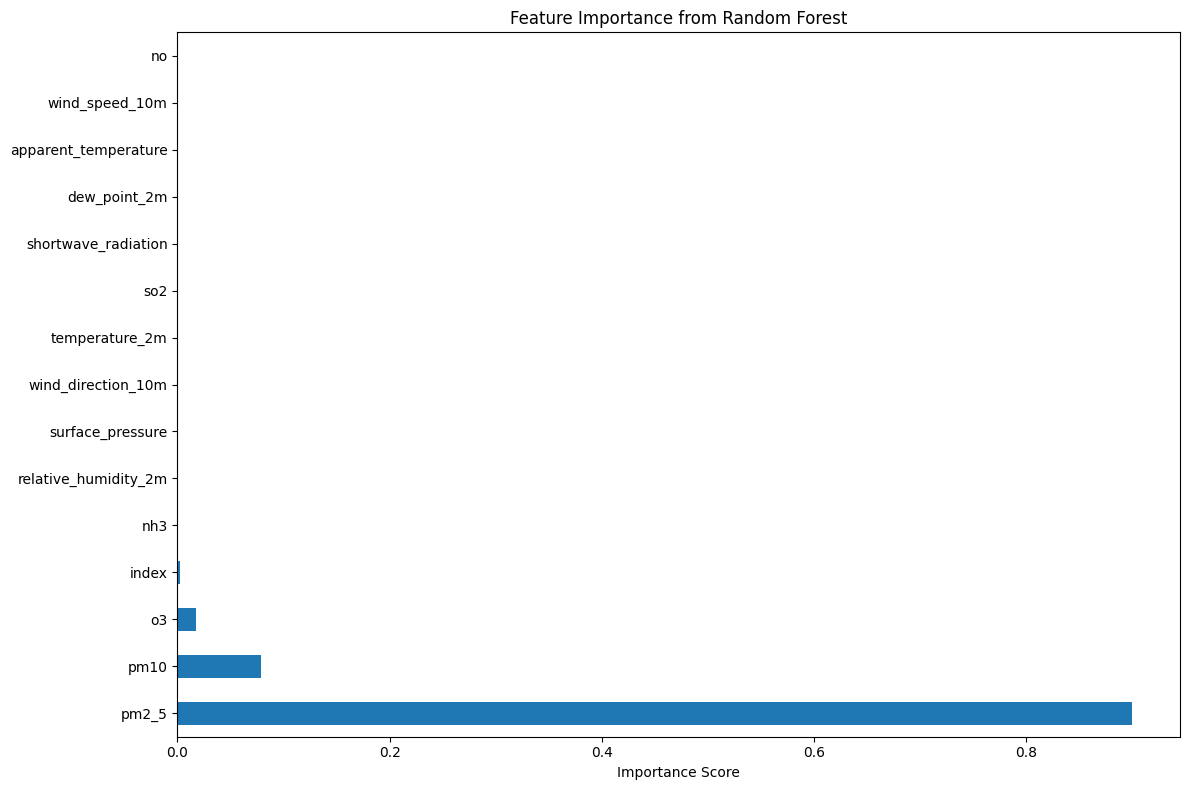

In [38]:
# Train a RandomForest model
# Using a sample for faster computation
sample_size = min(3000, len(X))
sample_indices = np.random.choice(len(X), sample_size, replace=False)

X_sample = X.iloc[sample_indices]
y_sample = y.iloc[sample_indices]

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_sample, y_sample)

# Plot standard Random Forest feature importance
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
feat_importances.head(15).plot(kind='barh')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

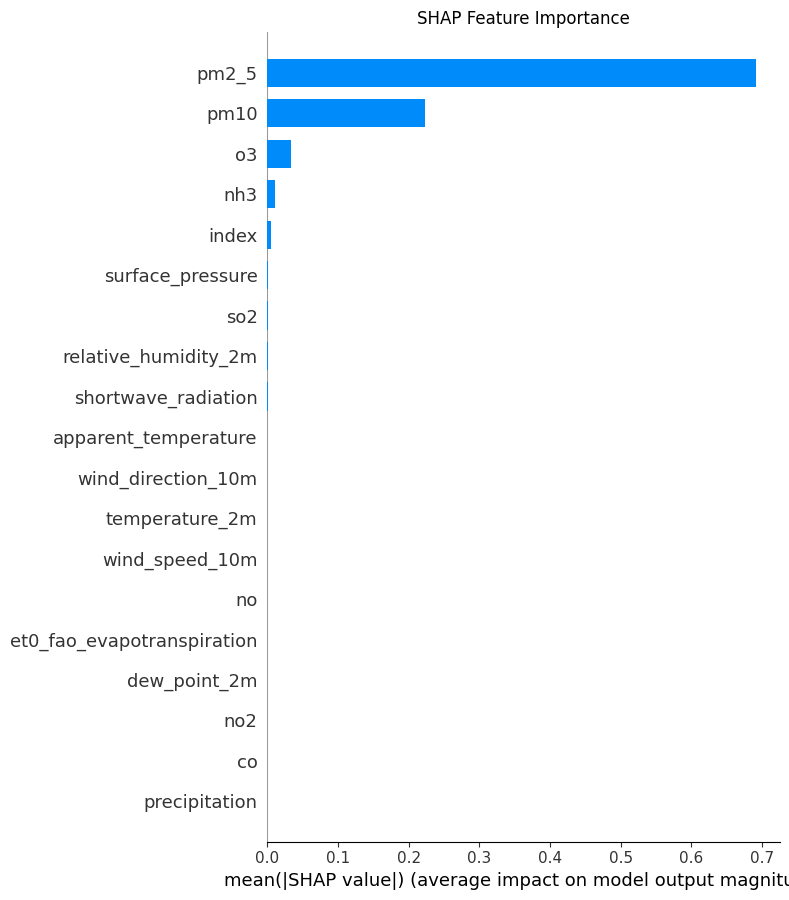

In [39]:
# Generate SHAP values
# Using a smaller subset for SHAP calculations (can be computationally intensive)
shap_sample_size = min(500, len(X_sample))
shap_indices = np.random.choice(len(X_sample), shap_sample_size, replace=False)
X_shap = X_sample.iloc[shap_indices]

# Create the SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_shap)

# Generate bar summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_shap, plot_type="bar", show=False)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()

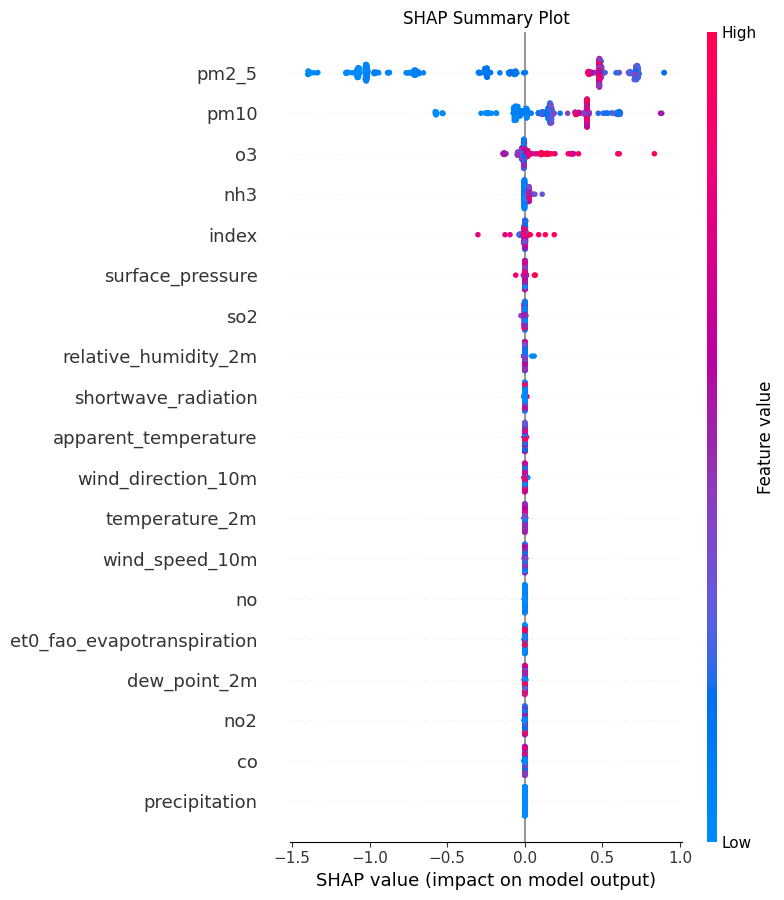

In [40]:
# SHAP Summary Plot (beeswarm) - shows both importance and effect direction
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_shap, show=False)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

Top 5 features by SHAP importance: ['pm2_5', 'pm10', 'o3', 'nh3', 'index']


<Figure size 1000x800 with 0 Axes>

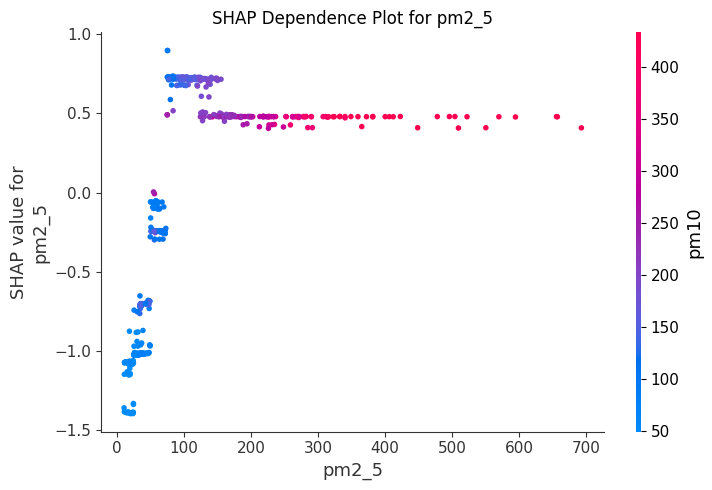

<Figure size 1000x800 with 0 Axes>

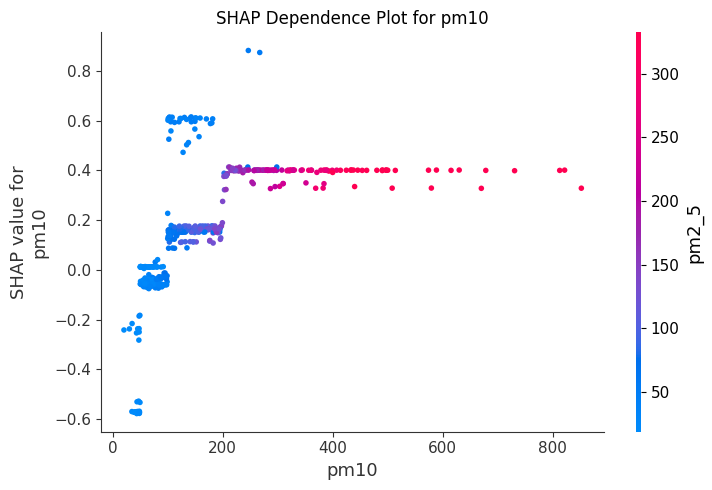

<Figure size 1000x800 with 0 Axes>

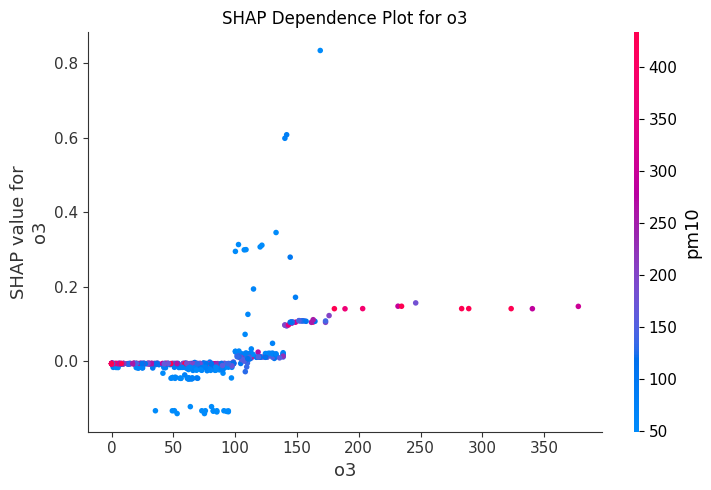

<Figure size 1000x800 with 0 Axes>

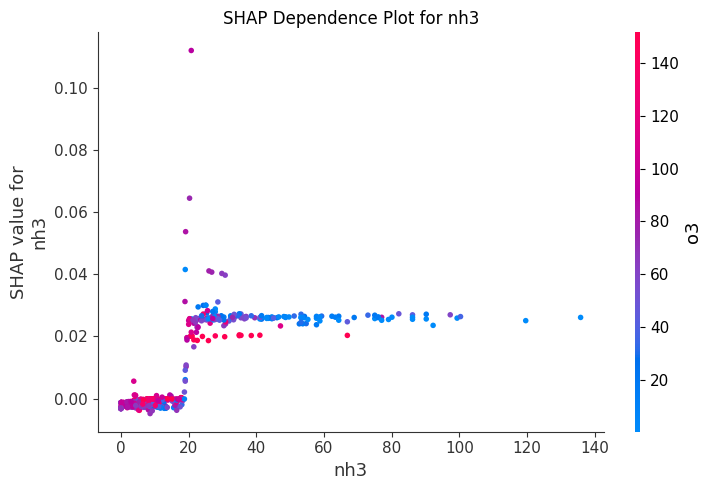

<Figure size 1000x800 with 0 Axes>

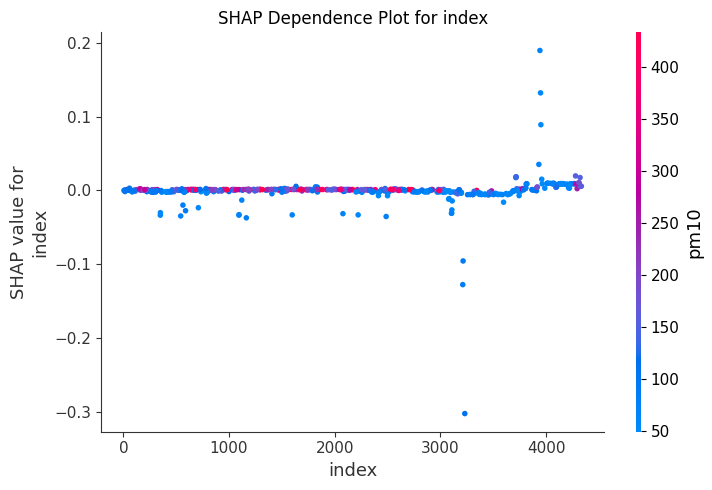

In [41]:
# Detailed analysis for top features
# Find the top 5 most important features based on SHAP values
mean_shap = np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X.columns, mean_shap)), columns=['Feature', 'SHAP Value'])
feature_importance.sort_values(by=['SHAP Value'], ascending=False, inplace=True)
top_features = feature_importance['Feature'].head(5).tolist()

print(f"Top 5 features by SHAP importance: {top_features}")

# Create dependence plots for top features
for feature in top_features:
    plt.figure(figsize=(10, 8))
    feature_idx = list(X.columns).index(feature)
    shap.dependence_plot(feature_idx, shap_values, X_shap, show=False)
    plt.title(f'SHAP Dependence Plot for {feature}')
    plt.tight_layout()
    plt.show()

<Figure size 2000x300 with 0 Axes>

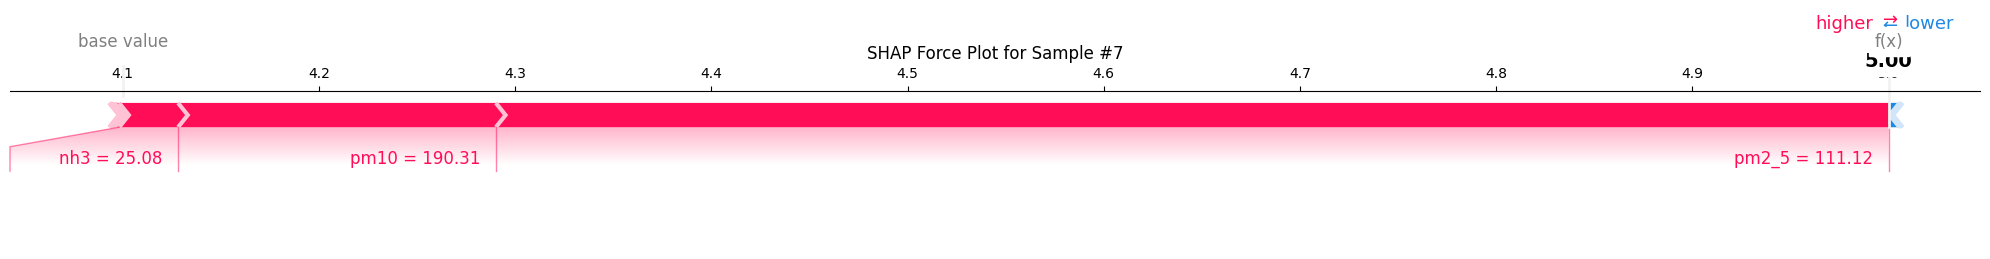

In [42]:
# Sample SHAP Force Plot for individual predictions
# Select a random sample
sample_idx = np.random.choice(len(X_shap))
plt.figure(figsize=(20, 3))
shap.force_plot(explainer.expected_value, shap_values[sample_idx,:], X_shap.iloc[sample_idx,:], 
               matplotlib=True, show=False)
plt.title(f'SHAP Force Plot for Sample #{sample_idx}')
plt.tight_layout()
plt.show()

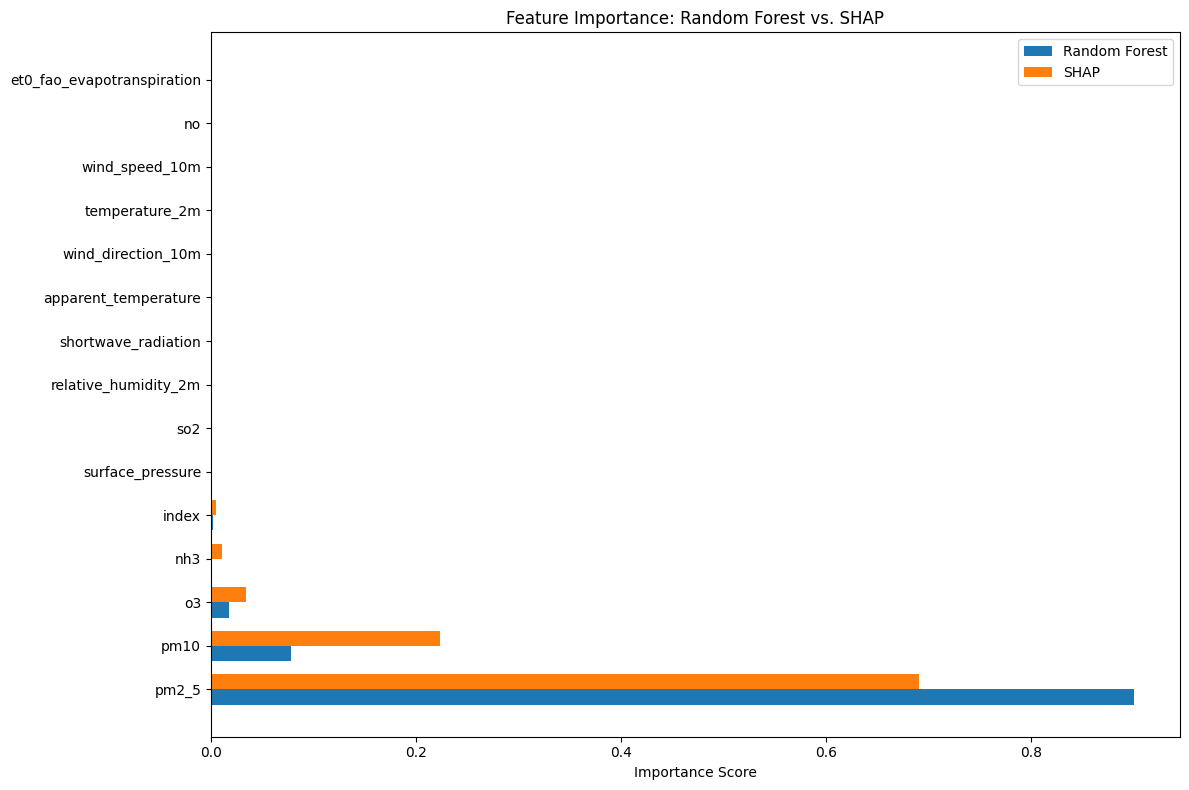

In [43]:
# Compare importance metrics (Random Forest vs SHAP)
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest Importance': model.feature_importances_
})

combined_importance = rf_importance.merge(feature_importance, on='Feature')
combined_importance = combined_importance.sort_values('SHAP Value', ascending=False).head(15)

# Plot comparison
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(combined_importance))

plt.barh(index, combined_importance['Random Forest Importance'], bar_width, label='Random Forest')
plt.barh(index + bar_width, combined_importance['SHAP Value'], bar_width, label='SHAP')

plt.yticks(index + bar_width/2, combined_importance['Feature'])
plt.xlabel('Importance Score')
plt.title('Feature Importance: Random Forest vs. SHAP')
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
# Print insights from SHAP analysis
print("\nKey Insights from SHAP Analysis:")
print("--------------------------------")
print(f"1. The top 5 most important features for predicting AQI index are: {', '.join(top_features)}")
print("2. SHAP values show how each feature contributes to pushing the prediction higher or lower")
print("3. The beeswarm plot shows both the importance magnitude and direction of influence")
print("4. Dependence plots reveal how the effect of each feature varies across its value range")
print("5. There are some differences between traditional Random Forest importance and SHAP values")


Key Insights from SHAP Analysis:
--------------------------------
1. The top 5 most important features for predicting AQI index are: pm2_5, pm10, o3, nh3, index
2. SHAP values show how each feature contributes to pushing the prediction higher or lower
3. The beeswarm plot shows both the importance magnitude and direction of influence
4. Dependence plots reveal how the effect of each feature varies across its value range
5. There are some differences between traditional Random Forest importance and SHAP values


Least important features (lowest SHAP values):
                       Feature  SHAP Value
11               precipitation    0.000000
1                           co    0.000134
3                          no2    0.000153
15                dew_point_2m    0.000158
18  et0_fao_evapotranspiration    0.000160

Dropping the two least important features: ['precipitation', 'co']

Original feature count: 19
Reduced feature count: 17


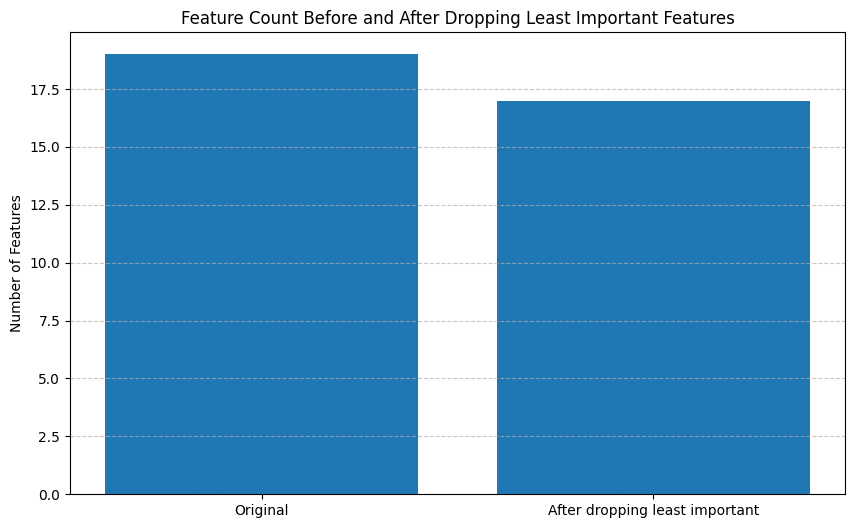


Model Performance Comparison:
Original model (all features):
  RMSE: 0.0558
  MSE: 0.0031 ± 0.0022
Reduced model (dropped 2 features):
  RMSE: 0.0646
  MSE: 0.0042 ± 0.0014

Performance change after dropping features: 15.82% RMSE


In [45]:
# Identify the least important features based on SHAP values
# First, ensure we have all features ranked by importance
all_feature_importance = pd.DataFrame(list(zip(X.columns, mean_shap)), 
                                     columns=['Feature', 'SHAP Value'])
all_feature_importance.sort_values(by=['SHAP Value'], ascending=True, inplace=True)

# Display the least important features
print("Least important features (lowest SHAP values):")
print(all_feature_importance.head(5))

# Identify the two least important features
least_important_features = all_feature_importance['Feature'].head(2).tolist()
print(f"\nDropping the two least important features: {least_important_features}")

# Create a new dataset without these features
X_reduced = X.drop(columns=least_important_features)
print(f"\nOriginal feature count: {X.shape[1]}")
print(f"Reduced feature count: {X_reduced.shape[1]}")

# Visualize the feature reduction
plt.figure(figsize=(10, 6))
plt.bar(['Original', 'After dropping least important'], [X.shape[1], X_reduced.shape[1]])
plt.title('Feature Count Before and After Dropping Least Important Features')
plt.ylabel('Number of Features')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Optional: Train a new model with reduced features to compare performance
sample_size_reduced = min(3000, len(X_reduced))
sample_indices_reduced = np.random.choice(len(X_reduced), sample_size_reduced, replace=False)

X_sample_reduced = X_reduced.iloc[sample_indices_reduced]
y_sample_reduced = y.iloc[sample_indices_reduced]

# Train a new model with reduced features
model_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
model_reduced.fit(X_sample_reduced, y_sample_reduced)

# Compare performance using cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate and compare models
def evaluate_model(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    mse_scores = -cv_scores  # Convert negative MSE to positive
    return {
        'MSE': mse_scores.mean(),
        'RMSE': np.sqrt(mse_scores.mean()),
        'MSE_std': mse_scores.std()
    }

# Evaluate both models
original_scores = evaluate_model(model, X_sample, y_sample)
reduced_scores = evaluate_model(model_reduced, X_sample_reduced, y_sample_reduced)

# Display results
print("\nModel Performance Comparison:")
print(f"Original model (all features):\n  RMSE: {original_scores['RMSE']:.4f}\n  MSE: {original_scores['MSE']:.4f} ± {original_scores['MSE_std']:.4f}")
print(f"Reduced model (dropped {len(least_important_features)} features):\n  RMSE: {reduced_scores['RMSE']:.4f}\n  MSE: {reduced_scores['MSE']:.4f} ± {reduced_scores['MSE_std']:.4f}")

# Calculate percentage change in performance
pct_change_rmse = 100 * (reduced_scores['RMSE'] - original_scores['RMSE']) / original_scores['RMSE']
print(f"\nPerformance change after dropping features: {pct_change_rmse:.2f}% RMSE")